This code is intended to analyze XML files returned from a single European Space Agency Sentinel-1 API image search in order to choose pairs of InSAR images for interferometry analyses. 


['Grid_S1A_IW_SLC__1SDV_20160801T154019_20160801T154046_012409_0135C9_4CBD', 'Grid_S1A_IW_SLC__1SDV_20160801T154044_20160801T154111_012409_0135C9_36A3', 'Grid_S1A_IW_SLC__1SDV_20160728T033533_20160728T033600_012343_01338A_6D40', 'Grid_S1A_IW_SLC__1SSV_20160721T034404_20160721T034434_012241_01303A_6A75', 'Grid_S1A_IW_SLC__1SDV_20160720T154043_20160720T154110_012234_012FF9_4E00', 'Grid_S1A_IW_SLC__1SDV_20160720T154019_20160720T154046_012234_012FF9_1C68', 'Grid_S1A_IW_SLC__1SDV_20160716T033532_20160716T033600_012168_012DDC_59F4', 'Grid_S1A_IW_SLC__1SDV_20160708T154043_20160708T154110_012059_012A51_FCBA', 'Grid_S1A_IW_SLC__1SDV_20160708T154018_20160708T154045_012059_012A51_F311', 'Grid_S1A_IW_SLC__1SSV_20160204T034355_20160204T034425_009791_00E525_28D2']


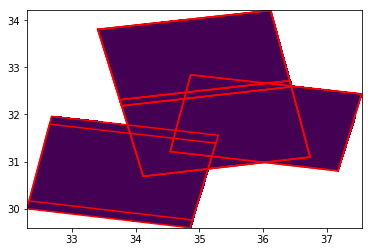

In [4]:
%matplotlib inline

import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import pickle

import xml.etree.ElementTree as ET

tree = ET.fromstring(xml)
root = {}

#Parse XML elements into list of coordinates for each image acquisition footprint
gridlist = []
bounds_list = []
for entry in tree.findall(".{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title")
        orbitdirection = entry.find(".//{http://www.w3.org/2005/Atom}str[@name='orbitdirection']")
        date = entry.find("{http://www.w3.org/2005/Atom}date")
        uuid = entry.find(".//{http://www.w3.org/2005/Atom}str[@name='uuid']")
        foot = entry.find(".{http://www.w3.org/2005/Atom}str[@name='footprint']")
        boundary = foot.text
        ingestion = date.text
        
# Turn text strings of Lat/Long coordinates into numpy array
        start = boundary.find( '((' )
        end = boundary.find( ' ))' )
        result = boundary[start+2:end-1]
        space = result.find(' ')
        results = (result.split(','))
        bounds  = np.array(list(map(lambda x: x.split(" "), results))).astype(float)
#Assign variables for gridding of lat/long coordinates
        x = bounds[:,0]
        y = bounds[:,1]
        plt.plot(x,y, color='r')
        z = np.ones((x.size))
#Create and fill grid with ones bounded by lat/long coordinates
        xsteps= 200    # resolution in x
        ysteps= 200    # resolution in y
        xi = np.linspace(min(x), max(x), xsteps)
        yi = np.linspace(min(y), max(y), ysteps)
        Z = griddata(x, y, z, xi, yi, interp='linear')  # interpolates between points in data
#Save each grid to filename format "Z_title"
        s = str(title.text)
#Load grids using unique filenames in order to conduct image comparison of horizontal baseline and percent overlap
        a = np.load('Z_'+s)
        plt.pcolormesh(xi, yi, a)
        gridlist.append('Grid_'+s)
        bounds_list.append('Bounds_'+s)
print(gridlist)
#print(bounds_list)
#Dump list
#with open('outfile', 'wb') as fp:
#    pickle.dump("gridlist", fp)
#with open('outfile', 'wb') as bl:
#    pickle.dump("bounds_list", bl)
#    
#
#with open('outfile', 'rb') as fp:
#    grdlist = pickle.load("gridlist", fp)
#with open('outfile', 'rb') as bl:   
#    bounds_list  = pickle.load('bounds_list', bl)


In [1]:
xml = """<?xml version="1.0" encoding="utf-8"?><feed xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/" xmlns="http://www.w3.org/2005/Atom">
<title>Sentinels Scientific Data Hub search results for: ((footprint:"Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))" ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))</title>
<subtitle>Displaying 0 to 9 of 99 total results. Request done in 0.043 seconds.</subtitle>
<updated>2017-05-26T06:43:49.003Z</updated>
<author>
<name>Sentinels Scientific Data Hub</name>
</author>
<id>https://scihub.copernicus.eu/dhus/search?q=((footprint:"Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))" ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))</id>
<opensearch:totalResults>99</opensearch:totalResults>
<opensearch:startIndex>0</opensearch:startIndex>
<opensearch:itemsPerPage>10</opensearch:itemsPerPage>
<opensearch:Query role="request" searchTerms="((footprint:&quot;Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))&quot; ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))" startPage="1"/>
<link rel="self" type="application/atom+xml" href="https://scihub.copernicus.eu/dhus/search?q=((footprint:&quot;Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))&quot; ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))&amp;start=0&amp;rows=10"/>
<link rel="first" type="application/atom+xml" href="https://scihub.copernicus.eu/dhus/search?q=((footprint:&quot;Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))&quot; ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))&amp;start=0&amp;rows=10"/>
<link rel="next" type="application/atom+xml" href="https://scihub.copernicus.eu/dhus/search?q=((footprint:&quot;Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))&quot; ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))&amp;start=10&amp;rows=10"/>
<link rel="last" type="application/atom+xml" href="https://scihub.copernicus.eu/dhus/search?q=((footprint:&quot;Intersects(POLYGON((34.88099697564715 31.315364176563506,35.585967012035425 31.315364176563506,35.585967012035425 32.53095670152007,34.88099697564715 32.53095670152007,34.88099697564715 31.315364176563506)))&quot; ) AND ( beginPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] AND endPosition:[2015-08-01T00:00:00.000Z TO 2016-08-01T23:59:59.999Z] ) AND (platformname:Sentinel-1 AND producttype:SLC AND polarisationmode:VV AND sensoroperationalmode:IW))&amp;start=98&amp;rows=10"/>
<link rel="search" type="application/opensearchdescription+xml" href="opensearch_description.xml"/>
<entry>
<title>S1A_IW_SLC__1SDV_20160801T154019_20160801T154046_012409_0135C9_4CBD</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('e352ff22-613e-420a-a3ef-d5e459860733')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('e352ff22-613e-420a-a3ef-d5e459860733')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('e352ff22-613e-420a-a3ef-d5e459860733')/Products('Quicklook')/$value"/>
<id>e352ff22-613e-420a-a3ef-d5e459860733</id>
<summary>Date: 2016-08-01T15:40:19.988Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.23 GB</summary>
<str name="uuid">e352ff22-613e-420a-a3ef-d5e459860733</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160801T154019_20160801T154046_012409_0135C9_4CBD.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;32.311630,33.748848 32.716850,36.420380 31.095545,36.740589 30.688038,34.117432 32.311630,33.748848&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160801T154019_20160801T154046_012409_0135C9_4CBD</str>
<date name="ingestiondate">2016-08-02T20:06:11.748Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((33.748848 32.311630,36.420380 32.716850,36.740589 31.095545,34.117432 30.688038,33.748848 32.311630))</str>
<int name="missiondatatakeid">79305</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12409</int>
<int name="lastorbitnumber">12409</int>
<str name="orbitdirection">ASCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">87</int>
<int name="lastrelativeorbitnumber">87</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-08-01T15:40:19.988Z</date>
<date name="endposition">2016-08-01T15:40:46.934Z</date>
<str name="size">7.23 GB</str>
<int name="slicenumber">4</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160801T154044_20160801T154111_012409_0135C9_36A3</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('594521e7-37db-4a90-b28a-c94f80bc706f')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('594521e7-37db-4a90-b28a-c94f80bc706f')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('594521e7-37db-4a90-b28a-c94f80bc706f')/Products('Quicklook')/$value"/>
<id>594521e7-37db-4a90-b28a-c94f80bc706f</id>
<summary>Date: 2016-08-01T15:40:44.807Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.23 GB</summary>
<str name="uuid">594521e7-37db-4a90-b28a-c94f80bc706f</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160801T154044_20160801T154111_012409_0135C9_36A3.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;33.805893,33.402798 34.209293,36.122852 32.588783,36.445160 32.183308,33.777164 33.805893,33.402798&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160801T154044_20160801T154111_012409_0135C9_36A3</str>
<date name="ingestiondate">2016-08-02T19:59:18.508Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((33.402798 33.805893,36.122852 34.209293,36.445160 32.588783,33.777164 32.183308,33.402798 33.805893))</str>
<int name="missiondatatakeid">79305</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12409</int>
<int name="lastorbitnumber">12409</int>
<str name="orbitdirection">ASCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">87</int>
<int name="lastrelativeorbitnumber">87</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-08-01T15:40:44.807Z</date>
<date name="endposition">2016-08-01T15:41:11.749Z</date>
<str name="size">7.23 GB</str>
<int name="slicenumber">5</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160728T033533_20160728T033600_012343_01338A_6D40</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('d0739239-ec1b-4681-ac6f-2e5fe7e2f181')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('d0739239-ec1b-4681-ac6f-2e5fe7e2f181')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('d0739239-ec1b-4681-ac6f-2e5fe7e2f181')/Products('Quicklook')/$value"/>
<id>d0739239-ec1b-4681-ac6f-2e5fe7e2f181</id>
<summary>Date: 2016-07-28T03:35:33.553Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.45 GB</summary>
<str name="uuid">d0739239-ec1b-4681-ac6f-2e5fe7e2f181</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160728T033533_20160728T033600_012343_01338A_6D40.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;30.803635,37.182251 31.212746,34.541935 32.842575,34.863544 32.435791,37.552990 30.803635,37.182251&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160728T033533_20160728T033600_012343_01338A_6D40</str>
<date name="ingestiondate">2016-07-28T07:49:14.683Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((37.182251 30.803635,34.541935 31.212746,34.863544 32.842575,37.552990 32.435791,37.182251 30.803635))</str>
<int name="missiondatatakeid">78730</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12343</int>
<int name="lastorbitnumber">12343</int>
<str name="orbitdirection">DESCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">21</int>
<int name="lastrelativeorbitnumber">21</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-28T03:35:33.553Z</date>
<date name="endposition">2016-07-28T03:36:00.643Z</date>
<str name="size">7.45 GB</str>
<int name="slicenumber">17</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SSV_20160721T034404_20160721T034434_012241_01303A_6A75</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('eecb403d-23f2-4a67-8aa9-0100b210f253')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('eecb403d-23f2-4a67-8aa9-0100b210f253')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('eecb403d-23f2-4a67-8aa9-0100b210f253')/Products('Quicklook')/$value"/>
<id>eecb403d-23f2-4a67-8aa9-0100b210f253</id>
<summary>Date: 2016-07-21T03:44:04.309Z, Instrument: SAR-C SAR, Mode: VV, Satellite: Sentinel-1, Size: 3.87 GB</summary>
<str name="uuid">eecb403d-23f2-4a67-8aa9-0100b210f253</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SSV_20160721T034404_20160721T034434_012241_01303A_6A75.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;29.595354,34.855782 30.000271,32.290287 31.795086,32.643639 31.392817,35.259499 29.595354,34.855782&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SSV_20160721T034404_20160721T034434_012241_01303A_6A75</str>
<date name="ingestiondate">2016-07-21T11:20:45.905Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((34.855782 29.595354,32.290287 30.000271,32.643639 31.795086,35.259499 31.392817,34.855782 29.595354))</str>
<int name="missiondatatakeid">77882</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12241</int>
<int name="lastorbitnumber">12241</int>
<str name="orbitdirection">DESCENDING</str>
<str name="polarisationmode">VV</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">94</int>
<int name="lastrelativeorbitnumber">94</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-21T03:44:04.309Z</date>
<date name="endposition">2016-07-21T03:44:34.133Z</date>
<str name="size">3.87 GB</str>
<int name="slicenumber">1</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160720T154043_20160720T154110_012234_012FF9_4E00</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('63397307-2634-4b8d-902b-fc7dfd0d1fb2')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('63397307-2634-4b8d-902b-fc7dfd0d1fb2')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('63397307-2634-4b8d-902b-fc7dfd0d1fb2')/Products('Quicklook')/$value"/>
<id>63397307-2634-4b8d-902b-fc7dfd0d1fb2</id>
<summary>Date: 2016-07-20T15:40:43.935Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.23 GB</summary>
<str name="uuid">63397307-2634-4b8d-902b-fc7dfd0d1fb2</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160720T154043_20160720T154110_012234_012FF9_4E00.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;33.806023,33.404186 34.209377,36.124027 32.588482,36.446404 32.183048,33.778629 33.806023,33.404186&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160720T154043_20160720T154110_012234_012FF9_4E00</str>
<date name="ingestiondate">2016-07-20T23:06:52.992Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((33.404186 33.806023,36.124027 34.209377,36.446404 32.588482,33.778629 32.183048,33.404186 33.806023))</str>
<int name="missiondatatakeid">77817</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12234</int>
<int name="lastorbitnumber">12234</int>
<str name="orbitdirection">ASCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">87</int>
<int name="lastrelativeorbitnumber">87</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-20T15:40:43.935Z</date>
<date name="endposition">2016-07-20T15:41:10.883Z</date>
<str name="size">7.23 GB</str>
<int name="slicenumber">5</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160720T154019_20160720T154046_012234_012FF9_1C68</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('ed2691ce-1b82-4ae0-92f3-a043ea65ca27')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('ed2691ce-1b82-4ae0-92f3-a043ea65ca27')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('ed2691ce-1b82-4ae0-92f3-a043ea65ca27')/Products('Quicklook')/$value"/>
<id>ed2691ce-1b82-4ae0-92f3-a043ea65ca27</id>
<summary>Date: 2016-07-20T15:40:19.112Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.23 GB</summary>
<str name="uuid">ed2691ce-1b82-4ae0-92f3-a043ea65ca27</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160720T154019_20160720T154046_012234_012FF9_1C68.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;32.311249,33.750351 32.716434,36.421684 31.094990,36.741913 30.687521,34.118954 32.311249,33.750351&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160720T154019_20160720T154046_012234_012FF9_1C68</str>
<date name="ingestiondate">2016-07-20T23:03:04.899Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((33.750351 32.311249,36.421684 32.716434,36.741913 31.094990,34.118954 30.687521,33.750351 32.311249))</str>
<int name="missiondatatakeid">77817</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12234</int>
<int name="lastorbitnumber">12234</int>
<str name="orbitdirection">ASCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">87</int>
<int name="lastrelativeorbitnumber">87</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-20T15:40:19.112Z</date>
<date name="endposition">2016-07-20T15:40:46.061Z</date>
<str name="size">7.23 GB</str>
<int name="slicenumber">4</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160716T033532_20160716T033600_012168_012DDC_59F4</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('2be6a4e9-3bf8-4d99-9313-2e8ab224a6c7')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('2be6a4e9-3bf8-4d99-9313-2e8ab224a6c7')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('2be6a4e9-3bf8-4d99-9313-2e8ab224a6c7')/Products('Quicklook')/$value"/>
<id>2be6a4e9-3bf8-4d99-9313-2e8ab224a6c7</id>
<summary>Date: 2016-07-16T03:35:32.991Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.45 GB</summary>
<str name="uuid">2be6a4e9-3bf8-4d99-9313-2e8ab224a6c7</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160716T033532_20160716T033600_012168_012DDC_59F4.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;30.803429,37.181717 31.212524,34.541370 32.841980,34.862885 32.435207,37.552345 30.803429,37.181717&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160716T033532_20160716T033600_012168_012DDC_59F4</str>
<date name="ingestiondate">2016-07-18T23:03:54.24Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((37.181717 30.803429,34.541370 31.212524,34.862885 32.841980,37.552345 32.435207,37.181717 30.803429))</str>
<int name="missiondatatakeid">77276</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12168</int>
<int name="lastorbitnumber">12168</int>
<str name="orbitdirection">DESCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">21</int>
<int name="lastrelativeorbitnumber">21</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-16T03:35:32.991Z</date>
<date name="endposition">2016-07-16T03:36:00.075Z</date>
<str name="size">7.45 GB</str>
<int name="slicenumber">17</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160708T154043_20160708T154110_012059_012A51_FCBA</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('9c22bcaa-526a-4135-ae2e-e0fdc6574d94')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('9c22bcaa-526a-4135-ae2e-e0fdc6574d94')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('9c22bcaa-526a-4135-ae2e-e0fdc6574d94')/Products('Quicklook')/$value"/>
<id>9c22bcaa-526a-4135-ae2e-e0fdc6574d94</id>
<summary>Date: 2016-07-08T15:40:43.388Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.23 GB</summary>
<str name="uuid">9c22bcaa-526a-4135-ae2e-e0fdc6574d94</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160708T154043_20160708T154110_012059_012A51_FCBA.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;33.806335,33.402866 34.209732,36.122787 32.588474,36.445263 32.182999,33.777420 33.806335,33.402866&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160708T154043_20160708T154110_012059_012A51_FCBA</str>
<date name="ingestiondate">2016-07-09T14:49:12.288Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((33.402866 33.806335,36.122787 34.209732,36.445263 32.588474,33.777420 32.182999,33.402866 33.806335))</str>
<int name="missiondatatakeid">76369</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12059</int>
<int name="lastorbitnumber">12059</int>
<str name="orbitdirection">ASCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">87</int>
<int name="lastrelativeorbitnumber">87</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-08T15:40:43.388Z</date>
<date name="endposition">2016-07-08T15:41:10.342Z</date>
<str name="size">7.23 GB</str>
<int name="slicenumber">5</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SDV_20160708T154018_20160708T154045_012059_012A51_F311</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('113d9d3c-fd5f-4342-a817-a6cb5ff0e096')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('113d9d3c-fd5f-4342-a817-a6cb5ff0e096')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('113d9d3c-fd5f-4342-a817-a6cb5ff0e096')/Products('Quicklook')/$value"/>
<id>113d9d3c-fd5f-4342-a817-a6cb5ff0e096</id>
<summary>Date: 2016-07-08T15:40:18.565Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.23 GB</summary>
<str name="uuid">113d9d3c-fd5f-4342-a817-a6cb5ff0e096</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SDV_20160708T154018_20160708T154045_012059_012A51_F311.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;32.311199,33.749138 32.716423,36.420544 31.094988,36.740795 30.687477,34.117764 32.311199,33.749138&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SDV_20160708T154018_20160708T154045_012059_012A51_F311</str>
<date name="ingestiondate">2016-07-09T14:43:15.321Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((33.749138 32.311199,36.420544 32.716423,36.740795 31.094988,34.117764 30.687477,33.749138 32.311199))</str>
<int name="missiondatatakeid">76369</int>
<str name="platformidentifier">2014-016A</str>
<int name="orbitnumber">12059</int>
<int name="lastorbitnumber">12059</int>
<str name="orbitdirection">ASCENDING</str>
<str name="polarisationmode">VV VH</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">87</int>
<int name="lastrelativeorbitnumber">87</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-07-08T15:40:18.565Z</date>
<date name="endposition">2016-07-08T15:40:45.513Z</date>
<str name="size">7.23 GB</str>
<int name="slicenumber">4</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
<entry>
<title>S1A_IW_SLC__1SSV_20160204T034355_20160204T034425_009791_00E525_28D2</title>
<link href="https://scihub.copernicus.eu/dhus/odata/v1/Products('9969314a-08cf-45de-b7e5-a158cfaaf718')/$value"/>
<link rel="alternative" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('9969314a-08cf-45de-b7e5-a158cfaaf718')/"/>
<link rel="icon" href="https://scihub.copernicus.eu/dhus/odata/v1/Products('9969314a-08cf-45de-b7e5-a158cfaaf718')/Products('Quicklook')/$value"/>
<id>9969314a-08cf-45de-b7e5-a158cfaaf718</id>
<summary>Date: 2016-02-04T03:43:55.368Z, Instrument: SAR-C SAR, Mode: VV, Satellite: Sentinel-1, Size: 3.87 GB</summary>
<str name="uuid">9969314a-08cf-45de-b7e5-a158cfaaf718</str>
<str name="acquisitiontype">NOMINAL</str>
<str name="filename">S1A_IW_SLC__1SSV_20160204T034355_20160204T034425_009791_00E525_28D2.SAFE</str>
<str name="gmlfootprint">&lt;gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"&gt;
   &lt;gml:outerBoundaryIs&gt;
      &lt;gml:LinearRing&gt;
         &lt;gml:coordinates&gt;29.761515,34.894127 30.166336,32.323574 31.961439,32.677296 31.559237,35.298668 29.761515,34.894127&lt;/gml:coordinates&gt;
      &lt;/gml:LinearRing&gt;
   &lt;/gml:outerBoundaryIs&gt;
&lt;/gml:Polygon&gt;</str>
<str name="format">SAFE</str>
<str name="identifier">S1A_IW_SLC__1SSV_20160204T034355_20160204T034425_009791_00E525_28D2</str>
<date name="ingestiondate">2016-07-05T01:56:54.54Z</date>
<str name="instrumentshortname">SAR-C SAR</str>
<str name="sensoroperationalmode">IW</str>
<str name="instrumentname">Synthetic Aperture Radar (C-band)</str>
<str name="swathidentifier">IW1 IW2 IW3</str>
<str name="footprint">POLYGON ((34.894127 29.761515,32.323574 30.166336,32.677296 31.961439,35.298668 31.559237,34.894127 29.761515))</str>
<int name="missiondatatakeid">58661</int>
<str name="platformidentifier">0000-000A</str>
<int name="orbitnumber">9791</int>
<int name="lastorbitnumber">9791</int>
<str name="orbitdirection">DESCENDING</str>
<str name="polarisationmode">VV</str>
<str name="productclass">S</str>
<str name="producttype">SLC</str>
<int name="relativeorbitnumber">94</int>
<int name="lastrelativeorbitnumber">94</int>
<str name="platformname">Sentinel-1</str>
<date name="beginposition">2016-02-04T03:43:55.368Z</date>
<date name="endposition">2016-02-04T03:44:25.198Z</date>
<str name="size">3.87 GB</str>
<int name="slicenumber">1</int>
<str name="status">ARCHIVED</str>
<str name="processed">F</str>
</entry>
</feed>
"""


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
import xml.etree.ElementTree as ET
tree = ET.fromstring(xml)
root = {}

# from xml.etree.ElementTree import XML, SubElement, Element

#Return all filenames of entries in tree

for entry in tree.findall(".{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title")
        orbitdirection = entry.find(".//{http://www.w3.org/2005/Atom}str[@name='orbitdirection']")
        date = entry.find("{http://www.w3.org/2005/Atom}date")
        uuid = entry.find(".//{http://www.w3.org/2005/Atom}str[@name='uuid']")
        foot = entry.find(".{http://www.w3.org/2005/Atom}str[@name='footprint']")
    #    print(title.text, orbitdirection.text, date.text, uuid.text, foot.text)
        boundary = foot.text
            
        start = boundary.find( '((' )
        end = boundary.find( ' ))' )
        result = boundary[start+2:end-1]
        space = result.find(' ')
        results = (result.split(','))
    #    coords = [list(map(float, coord.split(' '))) for coord in results]
        s  = np.array(list(map(lambda x: x.split(" "), results))).astype(float)
        x = s[:,0]
        y = s[:,1]
        plt.plot(x,y, color='r')
        z = np.ones((x.size))
    
    #-- New grid
        xsteps= 200    # resolution in x
        ysteps= 200    # resolution in y
        xi = np.linspace(min(x), max(x), xsteps)
        yi = np.linspace(min(y), max(y), ysteps)
        Z = griddata(x, y, z, xi, yi, interp='linear')  # interpolates between points in your data
###--
        #np.append(Z, date)
        plt.pcolormesh(xi, yi, Z)   # plot your elevation map :D
#plt.show()